## IMSE 586 Linear regression implementation using house sales data

### Data description:

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**id**: a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms

**bathrooms**: Number of bathrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors**: Total floors (levels) in house

**waterfront**: House which has a view to a waterfront

**view**: Has been viewed

**condition**: How good the condition is (Overall)

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above**: square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built**: Built Year

**yr_renovated**: Year when house was renovated

**zipcode**: zip code

**lat**: Latitude coordinate

**long**:Longitude coordinate

**sqft_living15**: Living room area in 2015 (implies– some renovations) This might or might not have affected the lotsize area

**sqft_lot15**: lotSize area in 2015 (implies– some renovations)
																				

In [39]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics

In [40]:
# Read in data
df_sales = pd.read_csv("house_data.csv")

# Data Checks

In [41]:
df_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df_sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [43]:
df_sales.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [44]:
df_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [45]:
df_sales.shape

(21613, 21)

In [46]:
df_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Visualizing and Examining the data

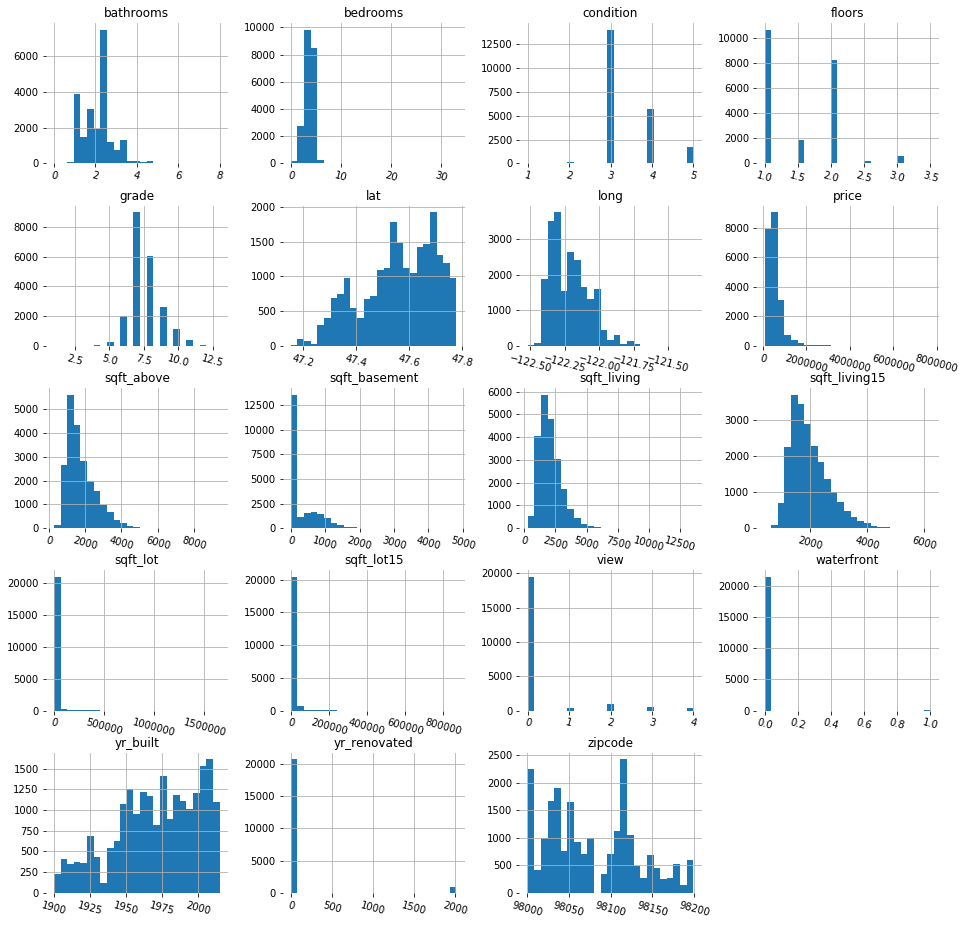

In [47]:
df_sales_ = df_sales[['price', 'bedrooms', 'bathrooms', 'sqft_living',
                'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                        'lat', 'long', 'sqft_living15', 'sqft_lot15']]

h = df_sales_.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)

sns.despine(left=True, bottom=True)

[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

# Heatmap based on the correlation matrix for all pairs of features.

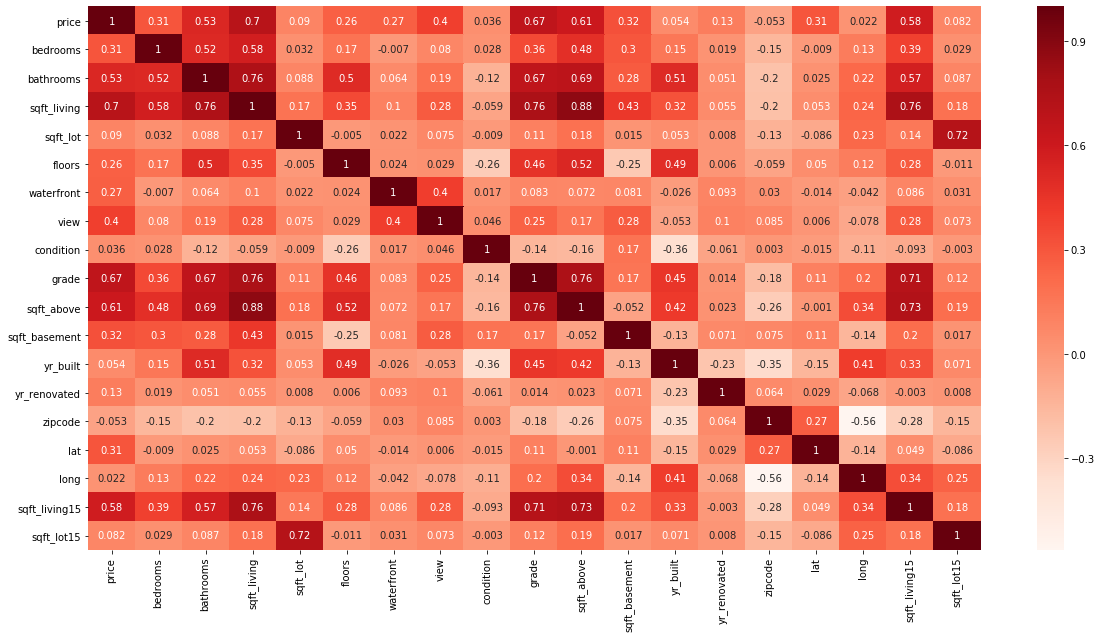

In [48]:
plt.figure(figsize = (20, 10))

cor = df_sales_.corr(method = 'pearson').round(3)

sns.heatmap(cor, cmap = plt.cm.Reds, annot = True)

plt.show()

###  Based on the heat map the living area (sqft) has the highest correlation coefficient with price.

# Fit a regression model to predict the Price using living area (sqft)

In [49]:
model_f = 'price ~ sqft_living'

result = smf.ols(formula = model_f, data = df_sales).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:43:20   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

### $\hat{\beta}_{sqft_living} =280.6236$
### When the sqft_living increases by feet, and holding all other predictors fixed, the price is expected to increase by 280.62 thousands of unit. 

From the output, we can see that the p-values were smaller than 0.05 for **Sqft_living**. And we reject the null hypothesis for this predictor. Also , at the 95% confidence intervals (CI's) the corresponding CI does not include zero.

### **Model 1**: The predictors are (1) the sqft_living, (2) the grade, and (3) the sqft_above. 

In [50]:
model_f = 'price ~ sqft_living + grade + sqft_above'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 61854605518.69751
R2: 0.5410567145098091
R2adj: 0.5409929989349804
AIC: 598383.9934650892
BIC: 598415.9176661472


In [51]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8492.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:43:20   Log-Likelihood:            -2.9919e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21609   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.512e+05   1.35e+04    -48.074      

#### From the output, we can see that the p-values were smaller than 0.05 for **sqft_living** , **grade**, and **sqft_above**. The sqft_living, grade and sqft_above are still significant predictors as their CI's do not include zero.

### **Model 2**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above and (4) the sqft_living15

In [52]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 61733003661.600845
R2: 0.5419589651239656
R2adj: 0.5418741741141774
AIC: 598343.4619879776
BIC: 598383.3672393


### **Model 3**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15 and (5) the bathrooms

In [53]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 61428294831.088295
R2: 0.544219816528976
R2adj: 0.5441143460371283
AIC: 598238.5179159119
BIC: 598286.4042174987


### **Model 4**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15 (5) the bathrooms and (6) the view

In [54]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 57147284623.53174
R2: 0.5759836742627245
R2adj: 0.5758659246582432
AIC: 596679.223305416
BIC: 596735.0906572674


### **Model 5**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15  (5) the bathrooms  (6) the view (7) the sqft_basement (8) Lat  and (9) the bedrooms

In [55]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + lat + bedrooms'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 48525791762.50925
R2: 0.639952658080297
R2adj: 0.6398193319029521
AIC: 593148.7104340688
BIC: 593220.5398864491


### **Model 6**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15 (5) the bathrooms  (6) the view (7) the sqft_basement (8) the Lat   (9) the bedrooms (10) the Waterfront and (11) the floors

In [56]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + lat + bedrooms + waterfront + floors'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 46131837578.59961
R2: 0.6577151058279326
R2adj: 0.6575566552704971
AIC: 592059.2630752481
BIC: 592147.0546281574


### **Model 7**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15 (5) the bathrooms  (6) the view (7) the sqft_basement (8) the Lat   (9) the bedrooms (10) the Waterfront  (11) the floors and (12) yr_renovated 

In [57]:
model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + \
                bathrooms + view + sqft_basement + lat + bedrooms + waterfront + floors + yr_renovated'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)

MSE: 45593323631.07787
R2: 0.661710723588088
R2adj: 0.6615384546171825
AIC: 591807.4824218146
BIC: 591903.2550249884


### **Model 8**: The predictors are (1) the sqft_living, (2) the grade,  (3) the sqft_above (4) the sqft_living15 (5) the bathrooms  (6) the view (7) the sqft_basement (8) the condition   (9) the bedrooms (10) the Waterfront  (11) the floors and (12) yr_renovated

In [59]:

model_f = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + \
                bathrooms + view + sqft_basement + condition + bedrooms + waterfront + \
                    floors + yr_renovated + sqft_lot'

result = smf.ols(formula = model_f, data = df_sales).fit()

print('MSE:', result.ssr/len(df_sales))
print('R2:', result.rsquared)
print('R2adj:', result.rsquared_adj)
print('AIC:', result.aic)
print('BIC:', result.bic)


MSE: 52335218229.105
R2: 0.6116878153292706
R2adj: 0.6114720863377869
AIC: 594790.0931901612
BIC: 594893.8468435995


### Model 7 is the best model as it has the highest adjusted $R^2$ and the lowest AIC and BIC. 

## Used the train/test split method to find the best model

In [60]:
y = df_sales.price

lr = linear_model.LinearRegression()

## Model 1

In [61]:
X = df_sales[['sqft_living', 'grade', 'sqft_above']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 54487036738.024994


## Model 2

In [62]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 54219073764.701126


## Model 3

In [63]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 54056357903.605545


## Model 4

In [64]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 50861960762.275314


## Model 5

In [65]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 42512135320.54637


## Model 6

In [66]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 40157160142.81689


## Model 7

In [67]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors', 'yr_renovated']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 39865171419.46333


## Model 8

In [68]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'condition', 'bedrooms', 'waterfront', 'floors', 'yr_renovated']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 3)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 46982988729.37444


### Based on the result, Model 7 is the best model as it has the lowest MSE. 

## used 10-fold cross validation to find the best model

## Model 1

In [69]:
X = df_sales[['sqft_living', 'grade', 'sqft_above']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

62013966568.46895

## Model 2

In [70]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

62024898718.563156

## Model 3

In [71]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

61725550919.72239

## Model 4

In [72]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

57428883962.64852

## Model 5

In [73]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

48759336251.33609

## Model 6

In [74]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

46427769416.412094

## Model 7

In [75]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors', 'yr_renovated']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

45896786578.98993

## Model 8

In [76]:
X = df_sales[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',
                 'sqft_basement', 'condition', 'bedrooms', 'waterfront', 'floors', 'yr_renovated']]

-cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

52866906242.63727

## Based on the result, Model 7 is the best among the eight, as it has the lowest MSE when we applied the cross-validation method. 